In [45]:
from risk_experiment.utils import get_all_subjects, get_all_behavior
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bids_folder = '/data/ds-risk'


In [7]:
rois = ['vtav2', 'sncv2', 'lc', 'meynert']

In [27]:
subjects = get_all_subjects(bids_folder)
decoding_info = pd.concat([sub.get_decoding_info('7t2', mask='npcr', n_voxels=0.0) for sub in subjects])
roi_responses = pd.concat([pd.concat([sub.get_roi_timeseries('7t2', roi, single_trial=True) for sub in subjects]) for roi in rois], axis=1)
behavior = behavior = get_all_behavior(sessions=['7t2'], bids_folder=bids_folder)

100%|██████████| 30/30 [00:01<00:00, 17.82it/s]


In [28]:
df = roi_responses.join(decoding_info).join(behavior[['n1']])

In [30]:
df.groupby(['subject']).apply(lambda d: d.corr()).groupby(level=-1).mean()

,vtav2,sncv2,lc,meynert,E,sd,n1
E,0.014750,-0.004896,0.007104,-0.013305,1.000000,0.584021,0.137347
lc,0.135631,0.185242,1.000000,0.105181,0.007104,0.012462,0.015815
meynert,0.259934,0.207259,0.105181,1.000000,-0.013305,-0.018311,0.011478
n1,-0.001056,0.010472,0.015815,0.011478,0.137347,0.070965,1.000000
sd,0.006105,-0.005696,0.012462,-0.018311,0.584021,1.000000,0.070965
sncv2,0.566979,1.000000,0.185242,0.207259,-0.004896,-0.005696,0.010472
vtav2,1.000000,0.566979,0.135631,0.259934,0.014750,0.006105,-0.001056


In [31]:
import bambi

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [37]:

roi = 'vtav2'
idatas = []

for roi in rois:
    print(roi)
    model = bambi.Model(f'sd ~ {roi}*n1 + ({roi}*n1|subject)', df.reset_index())
    idata = model.fit()
    idatas.append(idata)


vtav2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, vtav2, n1, vtav2:n1, 1|subject_sigma, 1|subject_offset, vtav2|subject_sigma, vtav2|subject_offset, n1|subject_sigma, n1|subject_offset, vtav2:n1|subject_sigma, vtav2:n1|subject_offset, sd_sigma]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 104 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6615, but should be close to 0.8. Try to increase the number of tuning steps.


sncv2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, sncv2, n1, sncv2:n1, 1|subject_sigma, 1|subject_offset, sncv2|subject_sigma, sncv2|subject_offset, n1|subject_sigma, n1|subject_offset, sncv2:n1|subject_sigma, sncv2:n1|subject_offset, sd_sigma]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 106 seconds.
The acceptance probability does not match the target. It is 0.666, but should be close to 0.8. Try to increase the number of tuning steps.


lc


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, lc, n1, lc:n1, 1|subject_sigma, 1|subject_offset, lc|subject_sigma, lc|subject_offset, n1|subject_sigma, n1|subject_offset, lc:n1|subject_sigma, lc:n1|subject_offset, sd_sigma]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 103 seconds.


meynert


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, meynert, n1, meynert:n1, 1|subject_sigma, 1|subject_offset, meynert|subject_sigma, meynert|subject_offset, n1|subject_sigma, n1|subject_offset, meynert:n1|subject_sigma, meynert:n1|subject_offset, sd_sigma]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 92 seconds.


TypeError: cannot concatenate object of type '<class 'arviz.data.inference_data.InferenceData'>'; only Series and DataFrame objs are valid

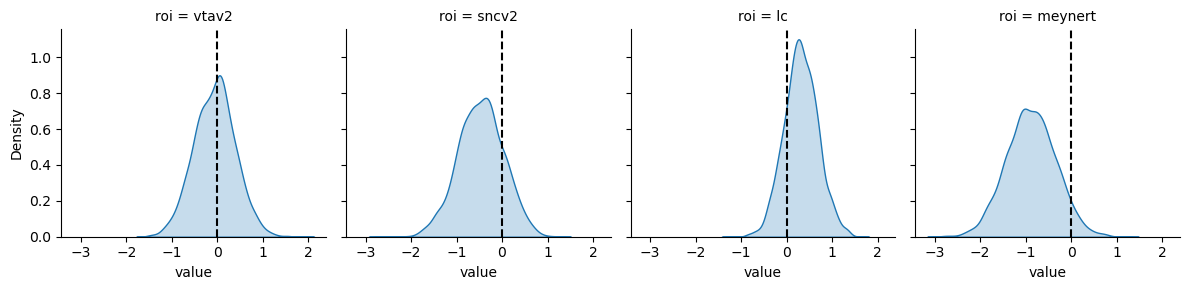

In [47]:
roi_traces = pd.concat([id.posterior[roi].to_dataframe() for id, roi in zip(idatas, rois)], axis=1)
roi_traces.columns.name = 'roi'
roi_traces = roi_traces.stack().to_frame('value')
fac = sns.FacetGrid(roi_traces.reset_index(), col='roi')

fac.map(sns.kdeplot, 'value', fill=True)
fac.map(lambda *args, **kwargs: plt.axvline(0.0, c='k', ls='--'))

In [48]:
roi_traces.groupby('roi').apply(lambda d: (d>0.0).mean())

,value
roi,
lc,0.8015
meynert,0.0500
sncv2,0.1835
vtav2,0.4570
